<a href="https://colab.research.google.com/github/nmaiya/ColabTimeSeries/blob/main/AutoRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [27]:
from statsmodels.tsa.ar_model import AutoReg, ARResults

In [12]:
df= pd.read_csv('/content/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq='MS'

In [13]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


<Axes: xlabel='DATE'>

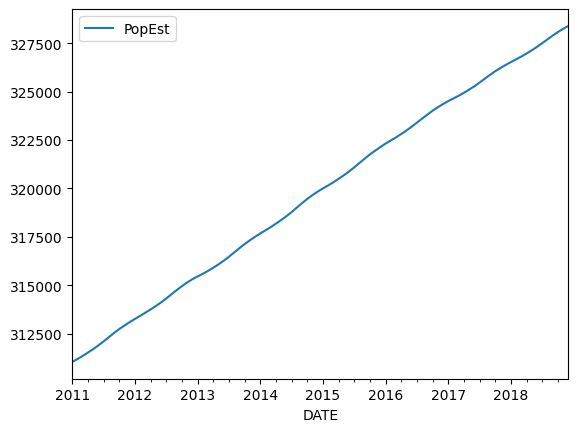

In [15]:
df.plot()

In [16]:
len(df)

96

In [21]:
train=df.iloc[:84]
test=df.iloc[84:]

In [37]:
model=AutoReg(train['PopEst'],lags=1)
model_fit=model.fit()

In [40]:
model_fit.params

const        284.913797
PopEst.L1      0.999686
dtype: float64

In [41]:
start=len(train)
end=len(train)+len(test)-1

In [43]:
model_fit.predict(start,end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [44]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [46]:
prediction1=model_fit.predict(start,end)
prediction1=prediction1.rename('prediction1')
prediction1

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, Name: prediction1, dtype: float64

<Axes: xlabel='DATE'>

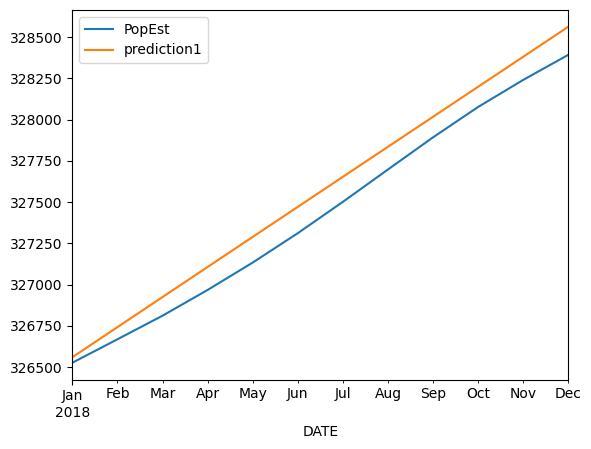

In [47]:
test.plot(legend=True)
prediction1.plot(legend=True)